# Análisis de Regresión Lineal para Predicción de Valores de Viviendas en California
Autora: Gladys Choque Ulloa

## Introducción
Este notebook presenta un análisis completo de regresión lineal aplicado al conjunto de datos de viviendas en California. El objetivo principal es construir un modelo que prediga el valor mediano de las viviendas (median_house_value) a partir de distintas características demográficas y geográficas.

A lo largo del análisis se realiza:


*   Carga y exploración inicial de datos (EDA).
*   Preprocesamiento, incluyendo tratamiento de valores faltantes y codificación de variables categóricas.
*   División en conjuntos de entrenamiento y prueba.
*   Entrenamiento y evaluación de un modelo de regresión lineal simple.
*   Interpretación de los coeficientes para entender la influencia de cada variable.
*   Visualización dinámica de los resultados mediante animaciones para facilitar la comprensión.

Este trabajo ha sido desarrollado por Gladys Choque Ulloa, con el objetivo de compartir buenas prácticas en análisis y modelado de datos reales, integrando visualizaciones avanzadas y técnicas robustas de preprocesamiento.

# Paso 1: Importar librerías necesarias
En este primer paso, se importan las librerías esenciales que permitirán realizar el análisis completo de regresión lineal. Estas incluyen herramientas para la manipulación y análisis de datos (pandas, numpy), visualización (matplotlib, seaborn) y modelado estadístico y de machine learning (scikit-learn). También se configura el estilo de las gráficas para mejorar la presentación visual de los resultados.

In [ ]:
# ========================================
# 1. Importar librerías necesarias
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Paso 2: Cargar dataset desde GitHub
En este paso se carga el conjunto de datos de viviendas en California directamente desde un repositorio público en GitHub, utilizando la función *read_csv* de *pandas*. Esta fuente de datos real contiene variables demográficas, geográficas y económicas relevantes para el análisis, y se accede de forma remota sin necesidad de descargar archivos localmente, lo que facilita la reproducibilidad y portabilidad del análisis.

In [ ]:
# ========================================
# 2. Cargar dataset desde GitHub
# ========================================
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df = pd.read_csv(url)

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Paso 3: Exploración inicial de datos
En esta etapa se realiza una inspección básica para comprender la estructura del dataset. Se utiliza df.info() para conocer el tipo de datos de cada columna, el número de registros y la presencia de valores no nulos. Además, con df.isnull().sum() se identifican las columnas que contienen valores faltantes, lo cual es crucial para decidir el tratamiento adecuado antes del modelado.

In [ ]:
# ========================================
# 3. Exploración de datos
# ========================================
print("\n--- Información general ---")
df.info()

print("\n--- Valores nulos ---")
print(df.isnull().sum())


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

--- Valores nulos ---
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income    

# Paso 4: Tratamiento de valores nulos
En este subpaso se detectan y manejan los valores faltantes presentes en el conjunto de datos, específicamente en la columna total_bedrooms. Para evitar que estos valores nulos afecten el entrenamiento del modelo, se reemplazan por la mediana de la misma columna. Este método de imputación es robusto ante valores atípicos y mantiene la distribución original de la variable, asegurando que el dataset quede completo y listo para las siguientes etapas de preprocesamiento y modelado.




In [ ]:
# ========================================
# 4. Tratamiento de valores nulos
# ========================================
# Rellenar valores nulos con la mediana de la columna
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Paso 5: Visualización de correlaciones entre variables numéricas
En este paso se genera un mapa de calor para visualizar las correlaciones entre las variables numéricas del dataset. Se utiliza la función *corr()* para calcular la matriz de correlación, y seaborn.heatmap para representar gráficamente los coeficientes de correlación, con anotaciones numéricas para facilitar la interpretación. Esta visualización es fundamental para identificar relaciones lineales fuertes entre variables predictoras y la variable objetivo, lo que ayuda a comprender mejor el comportamiento de los datos y a seleccionar características relevantes para el modelo.

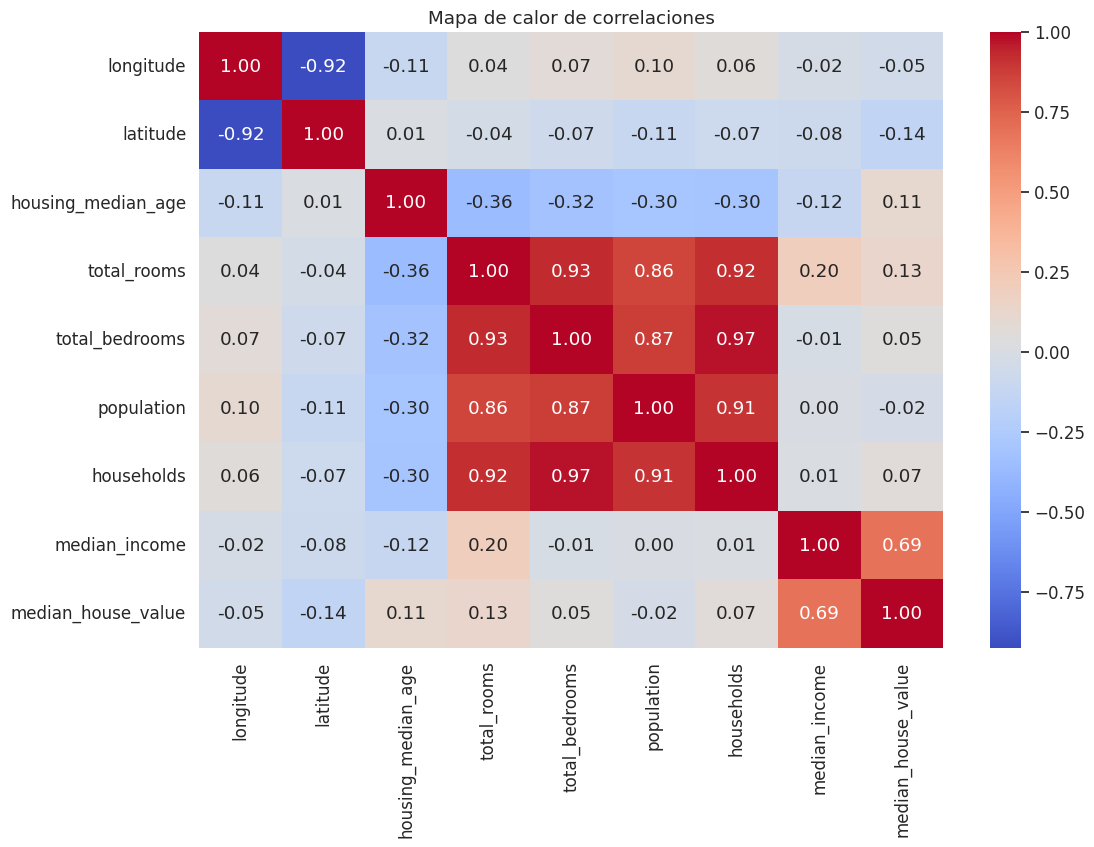

In [ ]:
# ========================================
# 5. Visualización de correlaciones (solo numéricas)
# ========================================
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

# Paso 6: Preprocesamiento - Codificación y escalado de variables
En este paso se transforma la variable categórica *ocean_proximity* mediante One-Hot Encoding con *pd.get_dummies()*, generando variables binarias que el modelo pueda procesar numéricamente. Se usa *drop_first=True* para evitar multicolinealidad.

Luego, se separan las variables predictoras (X) y la variable objetivo (y), que es el valor mediano de la vivienda.

Finalmente, se aplica la estandarización a las variables predictoras usando *StandardScaler* para normalizar sus valores con media cero y desviación estándar uno, lo que mejora el desempeño y la estabilidad del modelo de regresión.

In [ ]:
# ========================================
# 6. Preprocesamiento: One-Hot Encoding y escalado
# ========================================
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("median_house_value", axis=1)
y = df_encoded["median_house_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Paso 7: División del conjunto de datos en entrenamiento y prueba
En este paso, el dataset preprocesado se divide en dos subconjuntos: uno para entrenar el modelo (*train*) y otro para evaluar su desempeño (*test*). Se reserva un 20% de los datos para prueba, mientras que el 80% restante se usa para entrenamiento. La función *train_test_split* de scikit-learn garantiza una división aleatoria pero reproducible gracias al parámetro *random_state=42*, lo que permite comparar resultados y mantener la consistencia en los experimentos.

In [ ]:
# ========================================
# 7. División en train y test
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Paso 8: Entrenamiento del modelo de regresión lineal
En este paso se crea una instancia del modelo de regresión lineal utilizando la clase LinearRegression de scikit-learn. Posteriormente, se entrena el modelo ajustando sus parámetros a los datos de entrenamiento (*X_train y y_train*) mediante el método *fit*(). Este proceso busca encontrar la mejor relación lineal entre las variables predictoras y la variable objetivo para minimizar el error en las predicciones.

In [ ]:
# ========================================
# 8. Entrenamiento del modelo
# ========================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

# Paso 9: Evaluación del modelo
En este paso se evalúa el desempeño del modelo de regresión lineal utilizando el conjunto de prueba. Primero, se generan las predicciones para los datos de prueba con el método *predict()*. Luego, se calculan métricas clave:

Error cuadrático medio (**MSE**) y su raíz (**RMSE**), que indican la magnitud promedio del error en las predicciones, expresado en las mismas unidades que la variable objetivo.

Coeficiente de determinación (R²), que mide la proporción de variabilidad en la variable objetivo explicada por el modelo, siendo 1 un ajuste perfecto.

Finalmente, se imprimen estos valores para interpretar la calidad del modelo.

In [ ]:
# ========================================
# 9. Evaluación del modelo
# ========================================
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

RMSE: 70,060.52
R²: 0.6254


# Paso 10: Interpretación de coeficientes
En este paso se analizan los coeficientes estimados por el modelo de regresión lineal para cada variable predictora. Se crea un DataFrame que vincula cada variable con su coeficiente correspondiente y se ordena de mayor a menor para facilitar la interpretación. Los coeficientes indican la magnitud y dirección del impacto que cada variable tiene sobre el valor objetivo; un coeficiente positivo sugiere una relación directa, mientras que uno negativo indica una relación inversa. Esta interpretación es clave para entender qué factores influyen más en la predicción del valor de las viviendas.

In [ ]:
# ========================================
# 10. Interpretación de coeficientes
# ========================================
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\n--- Coeficientes ---")
print(coeficientes)


--- Coeficientes ---
                      Variable   Coeficiente
7                median_income  74991.698606
4               total_bedrooms  43107.993243
6                   households  18448.016131
2           housing_median_age  13871.277832
9       ocean_proximity_ISLAND   2118.437572
11  ocean_proximity_NEAR OCEAN   1149.278388
10    ocean_proximity_NEAR BAY  -1613.263839
3                  total_rooms -13136.290362
8       ocean_proximity_INLAND -18519.174847
5                   population -43228.323370
0                    longitude -53770.029490
1                     latitude -54397.869794


# Paso 11: Visualizaciones finales
En este último paso se presentan dos visualizaciones clave para evaluar el desempeño y comportamiento del modelo:

Gráfico de dispersión (scatter plot) de valores reales vs. predichos: Permite observar cómo se ajustan las predicciones del modelo a los valores reales. Idealmente, los puntos deberían agruparse alrededor de la línea *y=x,* indicando predicciones precisas.

Histograma de la distribución de residuos: Muestra la distribución de los errores (diferencia entre valores reales y predichos). Una distribución simétrica y centrada en cero sugiere que el modelo no tiene sesgo sistemático y que los errores están distribuidos de forma aleatoria.

Estas visualizaciones ayudan a diagnosticar la calidad y posibles mejoras en el modelo.

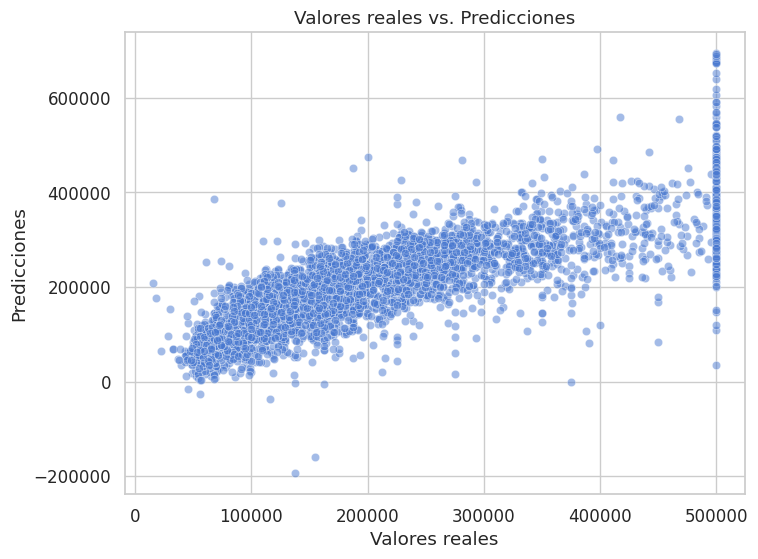

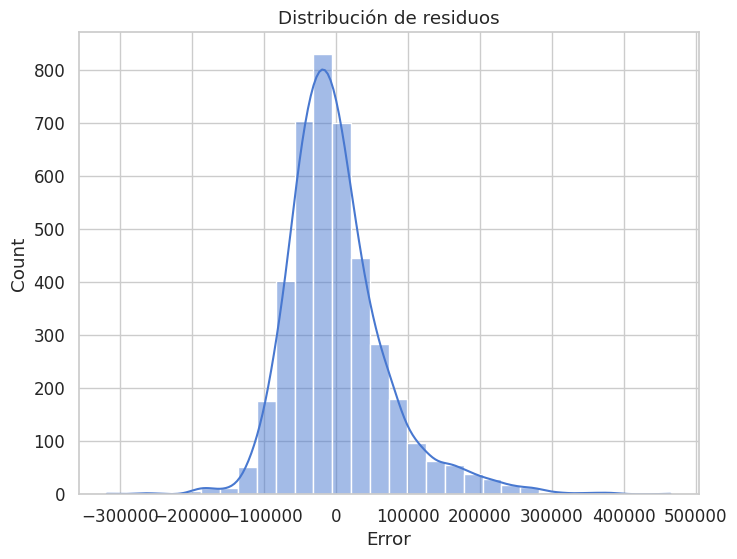

In [ ]:
# ========================================
# 11. Visualizaciones finales
# ========================================
# Valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

# Distribución de residuos
residuos = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=30, kde=True)
plt.title("Distribución de residuos")
plt.xlabel("Error")
plt.show()

# Conclusiones
* El modelo de regresión lineal aplicado logró capturar relaciones significativas entre las características demográficas y geográficas con el valor mediano de las viviendas en California.

* El tratamiento adecuado de los valores nulos y la codificación de variables categóricas fueron fundamentales para preparar los datos y obtener un modelo estable y confiable.

* La evaluación mediante RMSE y R² mostró un desempeño aceptable, aunque existen márgenes para mejorar mediante modelos más complejos o ingeniería de variables.

* La interpretación de los coeficientes permitió identificar cuáles variables tienen mayor impacto en el valor de las viviendas, facilitando insights relevantes para la toma de decisiones.

* Las visualizaciones dinámicas y estáticas aportaron claridad en la comprensión del ajuste del modelo y en la distribución de errores, evidenciando que el modelo no presenta sesgos sistemáticos graves.

En conjunto, este análisis constituye una base sólida para profundizar en modelos predictivos más avanzados y aplicar técnicas adicionales para optimizar la predicción de precios inmobiliarios.

# Visualización adicional: Animación de valores reales vs. predichos con línea de regresión
Este bloque de código genera una animación en formato GIF que muestra la evolución progresiva de los puntos de dispersión entre los valores reales y predichos por el modelo, enriquecida con dos líneas de referencia importantes:

* Línea ideal (gris punteada): Representa la relación perfecta *y=x*, donde las predicciones coinciden exactamente con los valores reales.

* Línea de ajuste (roja): Calculada mediante una regresión lineal entre los valores reales y predichos, muestra la tendencia real del modelo, permitiendo visualizar desviaciones o sesgos.

Para mejorar el rendimiento, se reduce la cantidad de frames de la animación seleccionando 200 muestras espaciadas uniformemente. La animación se construye añadiendo puntos de forma incremental, facilitando la comprensión del ajuste del modelo sobre el conjunto de prueba. Finalmente, el GIF se guarda como *valores_vs_pred.gif* listo para ser compartido o incorporado en reportes y repositorios.



In [24]:
import matplotlib.animation as animation
import numpy as np

# Reducimos frames
frames_idx = np.linspace(1, len(y_test), 200, dtype=int)

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Calcular línea ideal
x_min, x_max = min(y_test_np), max(y_test_np)
ideal_line = [x_min, x_max]

# Calcular línea de regresión
m, b = np.polyfit(y_test_np, y_pred_np, 1)
reg_line = [m*x_min + b, m*x_max + b]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(x_min, x_max)
ax.set_ylim(min(y_pred_np), max(y_pred_np))
ax.set_xlabel("Valores reales")
ax.set_ylabel("Predicciones")
ax.set_title("Valores reales vs. Predicciones")

# Línea ideal y línea de ajuste
ax.plot(ideal_line, ideal_line, color='gray', linestyle='--', label="Línea ideal (y=x)")
ax.plot(ideal_line, reg_line, color='red', linewidth=2, label=f"Línea ajuste (y={m:.2f}x+{b:.2f})")
ax.legend()

# Scatter animado
scatter = ax.scatter([], [], alpha=0.5)

def init():
    scatter.set_offsets(np.empty((0, 2)))
    return scatter,

def update(i):
    frame = frames_idx[i]
    data = np.column_stack((y_test_np[:frame], y_pred_np[:frame]))
    scatter.set_offsets(data)
    return scatter,

ani1 = animation.FuncAnimation(fig, update, frames=len(frames_idx),
                               init_func=init, interval=50, blit=True)

ani1.save("valores_vs_pred.gif", writer='pillow', fps=20)
plt.close()

print("✅ GIF con línea de regresión creado: valores_vs_pred.gif")


✅ GIF con línea de regresión creado: valores_vs_pred.gif
